In [116]:
from copy import copy
from math import log2
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap('gray')
from skimage.filters import gaussian

# Структуры данных

Структура данных - это множество объектов с интерфейсом, в котором доступны некоторые операции. Сразу перейдем к примерам.

## Кучи (Heaps)

Ссылки:

* [Лекции Бабенко 4 и 5](https://www.youtube.com/playlist?list=PLJOzdkh8T5koEPv-R5W0ovmL_T2BjB1HX). 4-ю можно смотреть с 40-ой минуты. Если интересно, можно посмотреть начало 5-ой, там рассказывается про биномиальные кучи.


* Кормен, глава 6.

В куче хранятся объекты вида $(k, v)$, где $k$ - **ключ** объекта (key), а $v$ - некоторые данные (value). Данные могут быть произвольные и они нас сейчас не интересуют. Ключ - это натуральное число, которое можно интепретировать как приоритет объекта (с помощью кучи можно реализовать так называемую очередь с приоритетами).

Должны поддерживаться следующие базовые операции (на самом деле возможны вариации, например, совсем необязательно операции должны что-то возвращать):

* $i = \text{Insert}(k)$ - операция вставки ключа $k$; возвращает **итератор**, указывающий на вставленный ключ.


* $\text{Remove}(i)$ - удаляет ключ, на который указывает итератор $i$.


* $k = \text{Get-Min}()$ - возвращает минимальный ключ в куче.


* $k = \text{Extract-Min}()$ - возвращает минимальный ключ и удаляет его из кучи.


* $i' = \text{Decrease-Key}(i, k')$ - уменьшает значение ключа, на который указывает итератор $i$ до значения $k'$ и возвращает итератор, указывающий на новое местоположение ключа в куче.

Одной из реализаций является реализация массивом $k[0, \ldots, n-1]$, где в качестве итератора будет выступать индекс элемента массива. Везде дальше мы будем предполагать эту реализацию. Правда, скоро станет понятно, что в таком случае итератор, который указывает на элемент после его помещения в кучу, через некоторое количество операций скорее всего будет указывать уже на другой элемент. Если же нам важно поддерживать свойство, что итератор все время указывает на один и тот же элемент, то придется приложить дополнительные усилия.

Набор базовых операций можно реализовать с помощью так называемой **бинарной кучи** (binary heap). Устроена она в виде почти полного бинарного дерева, у которого возможно отсутствуют несколько листьев справа на последнем уровне. При этом при построении поддерживается **свойство кучи: ключ сына всегда больше либо равен ключа родителя**. Несложно понять, что при реализации массивом у ключа $k[i]$ сыновьями будут ключи $k[2i+1]$ и $k[2i+2]$, а родителем будет ключ $k[\lfloor \frac{i-1}{2} \rfloor]$

Операции реализуются следующим образом.


* $\text{Insert}(k)$ помещает ключ $k$ в конец массива. Помещенный ключ может нарушить свойство кучи. Оно восстанавливается с помощью процедуры $\text{Sift-Up}(i)$. Она сравнивает ключ $k[i]$ с его родителем $k[\lfloor \frac{i-1}{2} \rfloor]$ и если он оказывается меньше, то она меняет их местами. Так как родитель был меньше первого своего сына (если тот был), то поднятый вверх второй сын будет тем более меньше и свойство кучи может нарушаться только между этим поднятым ключом и его новым родителем. Они снова сравниваются и так происходит до тех пор, пока поднимаемый ключ не окажется больше или равен своего очередного родителя.

    Заметьте, что пока помещенный в кучу ключ поднимается по ней вверх, индексы ключей в массиве, встречающихся на его пути, сбиваются. Если мы хотим хранить перманентные ссылки на ключи, то при $\text{Sift-Up}$ их нужно обновлять, а именно каждый раз когда мы меняем местами сына с родителем, мы должны найти ссылку, указывавшую на родителя, и обновить ее.
    
    Сложность процедуры $\text{Sift-Up}(i)$ равна глубине вершины $i$ то есть $O(\log i)$. Сложность $\text{Insert}(k)$ таким образом равна $O(\log n)$.
    
    
* $\text{Get-Min}()$ реализовать очень легко. Для этого нужно просто вернуть $k[0]$, так как в силу свойства кучи минимальный элемент находится в корне. 


* Сложнее обстоят дела с $\text{Extract-Min}()$. Для того чтобы удалить минимальный элемент мы меняем его с последним элементом массива и после этого удаляем и возвращаем его. У полученной кучи может быть нарушено свойство кучи в корне. Для того чтобы восстановить свойство кучи в этом случае используется процедура $\text{Sift-Down}(i)$. Если $k[i]$ оказывается больше, чем меньший из его сыновей, то мы меняем их местами. В таком случае несложно понять, что свойство кучи может быть нарушено только между спустившимся ключом и его новыми сыновьями. Спуск продолжается пока ключ не будет меньше обоих своих сыновей. 

    Сложность $\text{Sift-Down}(i)$ равна высоте вершины $i$ (длине самого длинного пути от $i$ до листа) то есть $O(\log n - \log i)$. Сложность $\text{Extract-Min}()$ равна $O(\log n)$.
    

* Операция $\text{Remove(i)}$ работает почти так же как $\text{Extract-Min}()$: меняет местами $i$-ый ключ с последним и запускает $\text{Sift-Down}(i)$. Сложность $O(\log n)$.
    
    
* $\text{Decrease-Key}(i, k')$ уменьшает значени ключа $k[i]$ до $k'$ и после этого поднимает его с помощью $\text{Sift-Up}(i)$. Сложность $O(\log n)$.

## Задание 1

Задача - реализовать бинарную кучу и с ее помощью алгоритм Дейкстры. Вы можете заполнить пропуски в коде ниже (в этом вам могут помочь уже реализованные методы). Вы так же можете стереть весь этот код под чистую и написать все сами 🙊.

In [208]:
class BinaryHeap():
    def __init__(self, items=None):
        self.items = []  # list of pairs (key, value)
        self.initial_index2index = []  # it is necessary if we want to maintain the initial iterators
        self.index2initial_index = []
        
        if items is not None:
            self.build_heap(items)
        
    
    def _get_key(self, index):
        return self.items[index][0]
    
    
    def _swap_items(self, index1, index2):
        self.items[index1], self.items[index2] = self.items[index2], self.items[index1]
        self.initial_index2index[self.index2initial_index[index1]] = index2
        self.initial_index2index[self.index2initial_index[index2]] = index1
        self.index2initial_index[index1], self.index2initial_index[index2] = self.index2initial_index[index2], self.index2initial_index[index1]
        
        
    def _sift_up(self, index):
        if index > 0:
            parent_index = (index - 1) // 2
            if self._get_key(index) < self._get_key(parent_index): 
                self._swap_items(index, parent_index)
                self._sift_up(parent_index)
            
            
    def _sift_down(self, index):
        if index < len(self.items) // 2:
            min_son_index = 2 * index + 1
            if 2 * index + 2 < len(self.items) and self._get_key(2 * index + 2) < self._get_key(2 * index + 1):
                min_son_index = 2 * index + 2
            if self._get_key(index) > self._get_key(min_son_index):
                self._swap_items(index, min_son_index)
                self._sift_down(min_son_index)

    
    def build_heap(self, items):
        self.items = copy(items)
        self.initial_index2index = list(range(len(self.items)))
        self.index2initial_index = list(range(len(self.items)))
        for index in reversed(range(len(self.items) // 2)):
            self._sift_down(index)
            
        
    def insert(self, item):
        self.items.append(item)
        self.initial_index2index.append(len(self.items) - 1)
        self.index2initial_index.append(len(self.items) - 1)
        self._sift_up(len(self.items) - 1)
        
        
    def get_min(self):
        return self.items[0]
    
    
    def extract_min(self):
        self._swap_items(0, -1)
        min_item = self.items.pop(-1)
        self.initial_index2index[self.index2initial_index[-1]] = np.nan
        del self.index2initial_index[-1]
        self._sift_down(0)
        return min_item
    
    
    def remove(self, index):
        self._swap_items(index, -1)
        del self.items[-1]
        self.initial_index2index[self.index2initial_index[-1]] = np.nan
        del self.index2initial_index[-1]
        self._sift_down(index)
        
        
    def decrease_key(self, index, new_key):
        assert new_key < self.items[index][0]
        
        self.items[index] = (new_key, self.items[index][1])
        self._sift_up(index)
        
    
    def is_not_empty(self):
        return len(self.items) != 0
    

In [ ]:
def dijkstra(adjacency_matrix: np.array, source: int):
    assert source < adjacency_matrix.shape[0]
    
    raw_vertices = BinaryHeap([(np.inf, np.nan) if vertex != source else (0, np.nan) 
                               for vertex in range(adjacency_matrix.shape[0])])
    processed_vertices = dict()
    while raw_vertices.is_not_empty():
        vertex = raw_vertices.index2initial_index[0]
        distance, _ = raw_vertices.extract_min()
        processed_vertices[vertex] = distance
        for neighbor in np.nonzero(adjacency_matrix[vertex])[0]:
            neighbor_index = raw_vertices.initial_index2index[neighbor]
            relaxation_distance = distance + adjacency_matrix[vertex, neighbor]
            if not np.isnan(neighbor_index) and relaxation_distance < raw_vertices.items[neighbor_index][0]:
                raw_vertices.decrease_key(neighbor_index, relaxation_distance)
                
    return processed_vertices

## Система непересекающихся множеств (Disjoint-set or Union-find data structure)

Ссылки:

* [9-ая лекция Бабенко](https://www.youtube.com/watch?v=KFcpDTpoixo&list=PLJOzdkh8T5koEPv-R5W0ovmL_T2BjB1HX&index=9), начиная с 46 минуты.


* [Доказательство][1] учетной сложности $O(\log^* n)$.
[1]: https://en.wikipedia.org/wiki/Proof_of_O(log*n)_time_complexity_of_union%E2%80%93find


* Кормен, глава 21.


Эта структура нужна для хранения элементов, принадлежащих непересекающимся множествам. Должны быть доступны следующие операции:

* $\text{Make-Set}(x)$ - добавляет в струкутру элемент $x$ и создает для него отдельное множество, которое состоит только из $x$.


* $\text{Find}(x)$ - возвращает главного представителя множества, которому принадлежит $x$ (для всех элементов одного множества эта операции должна возвращать один и тот же элемент из этого множества).


* $\text{Union}(x, y)$ - если $x$ и $y$ принадлежат разным множествам, объединяет их в одно.

Начнем с простой реализации и потом введем две ее модификации. Реализовать эту структуру можно с помощью леса деревьев. Каждое множество реализуется деревом, в вершинах которого находятся элементы. У каждого элемента есть ссылка на его родителя, у корня эта ссылка на самого себя. Представителем множества является элемент в корне.

Операции реализуются следующим образом

* $\text{Make-Set}(x)$ добавляет в структуру дерево, состоящее из одного узла $x$.


* $\text{Find}(x)$ переходит от $x$ к его родителю, от него к его родителю и так продолжает подниматься вверх по дереву до корня $\overline{x}$ и возвращает его.


* $\text{Union}(x, y)$ находит $\overline{x} = \text{Find}(x)$ и $\overline{y} = \text{Find}(y)$, после чего рисует ребро из $\overline{x}$ в $\overline{y}$.

Сколько может стоить операция $\text{Find}$ в худшем случае, если не делать никаких уточнений к реализации? Понятно, что может получиться, что большое множество реализуется очень глубоким деревом (по сути списком) и при вызове $\text{Find}$ от глубокого элемента сложность может быть $O(n)$, где $n$ - количество элементов в структуре данных.

Для того чтобы этого избежать надо чуть умнее строить деревья (так чтобы они не сильно разрастались в глубину). Для каждого элемента $x$ будем поддерживать число $\text{rank}(x)$, называемое рангом, которое равно глубине поддерева с корнем в $x$. При операции $\text{Union}(x, y)$ после того, как мы находим $\overline{x}$ и $\overline{y}$ у нас есть свобода какое дерево присоединять к другому. Будем присоединять менее глубокое дерево к более глубокому, а именно если $\text{rank}(\overline{x}) \le \text{rank}(\overline{y})$, то $\overline{y}$ становится родителем $\overline{x}$. При этом если $\text{rank}(\overline{x}) = \text{rank}(\overline{y})$, то ранг $\overline{y}$ надо обновить, увеличив на единицу.

При такой реализации $\text{Union}$ оказывается, что всегда верно, что $2^{\text{rank(x)}}$ не превосходит количество потомков вершины $x$. Это можно доказать по индукции по числу операций. Неравенство может нарушиться если ранг вершины $x$ увеличился. Это может произойти только при операции $\text{Union}$ при присоединении к корню $x$ корня $y$, причем обязательно до объединения было выполнено $\text{rank}(x) = \text{rank}(y)$. Тогда по предположению индукции суммарное число потомков вершин $x$ и $y$ (которые все стали потомками $x$) больше или равно чем

$$
2^{\text{rank}(x)} + 2^{\text{rank}(y)} = 2 \cdot 2^{\text{rank}(x)} = 2^{\text{rank}(x) + 1},
$$

что и требовалось, так как $\text{rank}(x) + 1$ - это и есть обновленный ранг $x$.

Из неравенства $2^{\text{rank(x)}} \le $ число потомков $x$, получаем, что $\text{rank}(x) \le \log n$ для любой вершины $x$, где $n$ - количество элементов в структуре. Это верно в том числе и для корней, поэтому все деревья в структуре имеют глубину $O(\log n)$. Таким образом сложность операции $\text{Find}$ становится $O(\log n)$.

Введенная модификация называется **объединение по рангу (union by rank)**. Существует вторая мофикация, которая в комбинации с первой позволяет достичь еше лучшей эффективности. Она называется **сжатие путей (path compression)**. Идея очень проста: давайте для вершин, для которых мы уже нашли представителя делать его их прямым родителем. Реализация этой модификации заключается в том, что в операции $\text{Find}(x)$ все вершины, по которым мы поднимаемся до корня соединяются с ним напрямую. Количество элементарных операций в отдельном $\text{Find}$ возрастает в два раза (надо сначала подняться один раз чтобы найти корень, а затем второй чтобы обновить ссылки на родителей). 

Очень важно понимать, что ранги при этой операции **не обновляются**. При этом они перестают быть точными значениями глубин поддеревьев, а становятся оценками сверху на эти глубины. Неравенство, связывающее ранги и количества потомков конечно остается верным, потому что модификация не меняет ни ранги, ни количества потомков (если вершина становится потомком другой, то она им остается на протяжении всего времени жизни структуры).

Оказывается, что для получившейся структры верно следующее утверждение об ее эффективности. Если изначально структура пуста и совершается $m$ произвольных операций $\text{Make-Set}$, $\text{Find}$ или $\text{Union}$, после которых в структуре находится $n$ элементов, то тогда суммарная сложность всех операций $O(m \log^* n)$, где $\log^* n$ - количество раз, которое нужно взять логарифм от $n$ чтобы получить число $\le 1$. В своей [лекции](https://www.youtube.com/watch?v=KFcpDTpoixo&list=PLJOzdkh8T5koEPv-R5W0ovmL_T2BjB1HX&index=9) c 1:12:30 Бабенко очень наглядно рассказывает про эту функцию.

## Задание 2 (дополнительное)

Прочитайте [здесь](https://courses.cs.washington.edu/courses/cse373/00au/chcon.pdf) (предпочтительнее) или на [вики](https://en.wikipedia.org/wiki/Connected-component_labeling) про задачу connected components labeling и реализуйте two-pass алгоритм, используя структуру Union-find, которую вы можете реализовать сами или разобраться в моей реализации.

In [117]:
class DSU():
    """
    Elements are indices from 0 to n - 1
    """
    def __init__(self):
        self.parent = []  # self.parent[i] - parent of i-th element 
        self.rank = []  # self.rank[i] - rank of i-th element
        self.size = 0  # number of elements in structure
        
        
    def make_set(self):
        """
        Add another element in structure as a root of new tree. 
        Its parent is itself and rank is 0.
        """
        self.parent.append(self.size)
        self.rank.append(0)
        self.size += 1
        
        
    def find(self, index):
        """
        Find root of the tree which contains `index`-th element.
        Performs path compression.
        """
        # find root
        root = index
        while root != self.parent[root]:
            root = self.parent[root]
            
        # path compression
        while index != root:
            index, self.parent[index] = self.parent[index], root
            
        return root
            
            
    def union(self, index1, index2):
        """
        Unite trees containing `index1`-th and `index2`-th elements accoding to "union by rank" heuristics.
        """
        root1, root2 = self.find(index1), self.find(index2)
        if root1 != root2:
            if self.rank[root1] >= self.rank[root2]:
                self.parent[root2] = root1
                if self.rank[root1] == self.rank[root2]:
                    self.rank[root1] += 1
            else:
                self.parent[root1] = root2

In [105]:
def generate_binary_image(width=1000, height=1000, p=5e-5, sigma=30, eps=1e-5):
    image = np.random.binomial(1, p=probability, size=(width, height)).astype(bool)
    image = gaussian(image, sigma=sigma) > eps
    return image

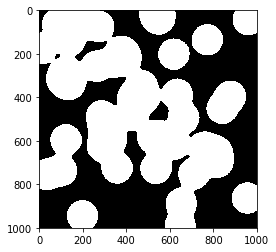

In [115]:
plt.imshow(generate_binary_image())